# Content

##Attributes

###People

*   **ID**: Customer's unique identifier
*   **Education**: Customer's education level
*   **Age**: Customer´s age
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **#_children_at_home**: Number of children plus teenagers in customer's household
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if customer complained in the last 2 years, 0 otherwise

###Products

*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years


###Promotion

*   **NumDealsPurchases**: Number of purchases made with discount
*   **Promotion_#_campaign_accepted:** Number of campaign that the customer accepted the promotion  

###Place

*   **NumWebPurchases**: Number of purchases made through the company’s web site
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s web site in the 
*   **lifetime_so_far_days:**  Number of days that have passed since the person started to be a ccustomer

In [33]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/db
Income Response


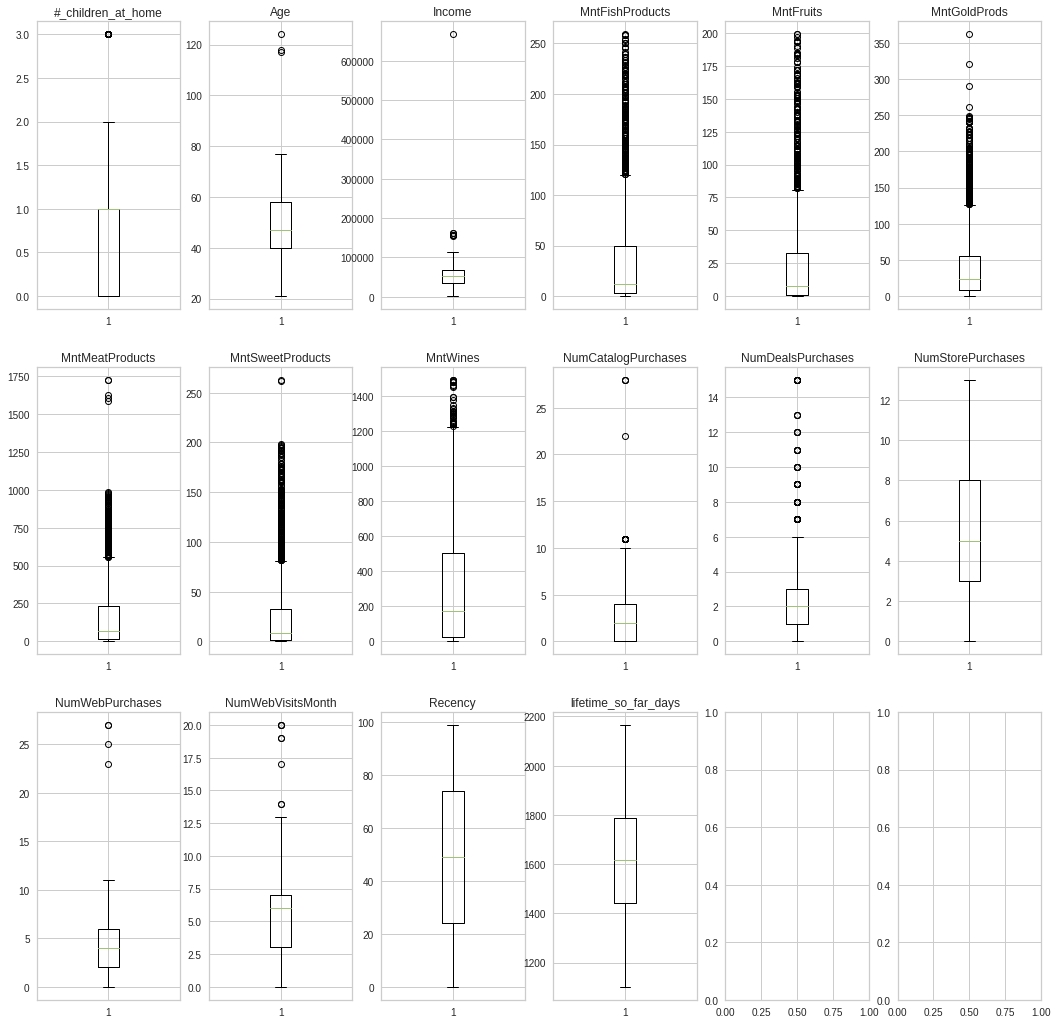

Ready


In [34]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/1.-Generating_a_proper_dataset.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Functions.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Load_libraries.ipynb'

# **Standardization of category variables into dummy variables & Scaling of the data**

In [35]:
# At the EDA I noticed that the column 'Complain' is not relevant because only 3 persons complained in the last 2 years. So, the column is dropped:
mk.drop(['Complain','ID'], axis=1, inplace=True)

In [36]:
# The category type of variable will be converted into dummie variables
mk = pd.get_dummies(mk, columns=['Education','Marital_Status','Promotion_#_campaign_accepted'], drop_first=True)
mk.info()

# Now we can apply the PCA method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1 to 2240
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           2240 non-null   float64
 1   Recency                          2240 non-null   int32  
 2   MntWines                         2240 non-null   float64
 3   MntFruits                        2240 non-null   float64
 4   MntMeatProducts                  2240 non-null   float64
 5   MntFishProducts                  2240 non-null   float64
 6   MntSweetProducts                 2240 non-null   float64
 7   MntGoldProds                     2240 non-null   float64
 8   NumDealsPurchases                2240 non-null   int32  
 9   NumWebPurchases                  2240 non-null   int32  
 10  NumCatalogPurchases              2240 non-null   int32  
 11  NumStorePurchases                2240 non-null   int32  
 12  NumWebVisitsMonth   

In [37]:
scaled_mk = StandardScaler().fit_transform(mk)
df_scaled_mk = pd.DataFrame(scaled_mk,columns = mk.columns)
df_scaled_mk.head(2)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,lifetime_so_far_days,#_children_at_home,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Engaged,Promotion_#_campaign_accepted_1,Promotion_#_campaign_accepted_2,Promotion_#_campaign_accepted_3,Promotion_#_campaign_accepted_4,Promotion_#_campaign_accepted_5,Promotion_#_campaign_accepted_6
0,0.3,0.3,1.0,1.6,1.7,2.5,1.5,0.8,0.3,1.4,2.5,-0.6,0.7,1.0,2.0,-1.3,-0.2,1.0,-0.4,-0.5,-1.3,-0.3,-0.1,-0.3,-0.2,-0.2,3.8
1,-0.3,-0.4,-0.9,-0.6,-0.7,-0.7,-0.6,-0.7,-0.2,-1.1,-0.6,-1.2,-0.1,1.3,-1.7,1.4,-0.2,1.0,-0.4,-0.5,-1.3,-0.3,-0.1,-0.3,-0.2,-0.2,-0.3


# **PCA**

In [38]:
len(mk.columns)

27

In [39]:
pca = PCA(n_components=0.80)
pca.fit(scaled_mk)
pca_mk = pca.transform(scaled_mk)
df_pca_mk = pd.DataFrame(pca_mk)
df_pca_mk.head(2)
# If I want to capture 80% of the variance I need to use 13 components from 27

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.9,0.7,2.9,2.6,0.3,-2.2,-1.3,0.2,0.5,-0.5,-1.2,-0.2,-1.5,1.3
1,-2.3,-1.0,-0.3,-1.7,0.4,-1.6,0.4,0.2,0.9,-0.3,-0.6,1.1,0.7,0.5


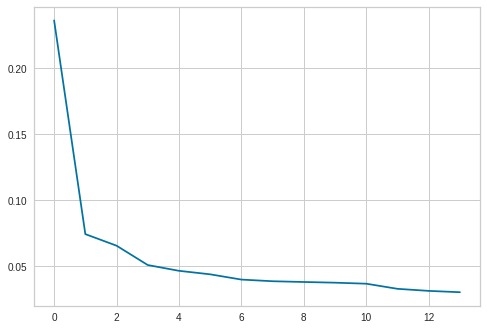

In [40]:
plt.plot(range(len(pca.explained_variance_)),
         pca.explained_variance_ratio_)
plt.show()
# Way to show how each component carry on the total variance. We can see that the fisrt componet is the most relevant of all of them (over 20% of the total variance)

# **Defining the number of clusters**

Some experiments based on the following article: 
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad#:~:text=%23%20k%20is%20range%20of%20number%20of%20clusters.,-visualizer%20%3D%20KElbowVisualizer(model&text=The%20optimal%20number%20of%20clusters%20based%20on%20Silhouette%20Score%20is%204.

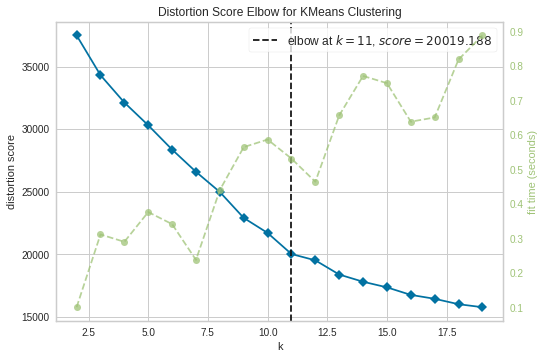

In [41]:
# Elbow method based on the article with yellowbrick library
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(pca_mk )
visualizer.show()

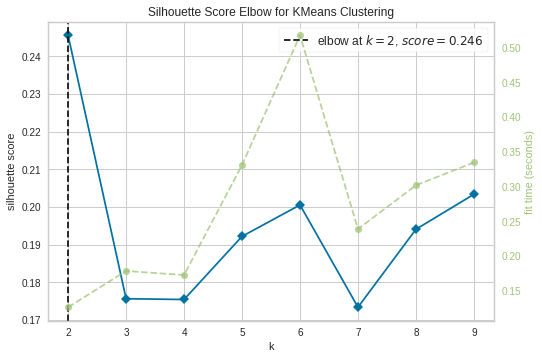

In [42]:
# Silhouette method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(pca_mk)
visualizer.show()

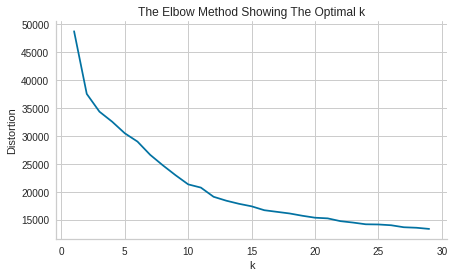

In [43]:
# Conventional K-means: We use the following interval: 0-30
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_mk)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(7,4))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sns.despine()
plt.show()

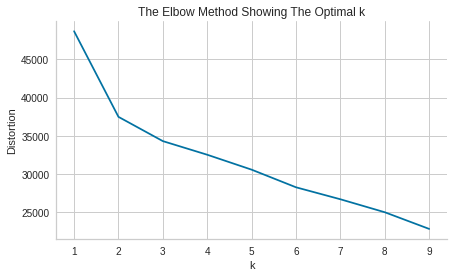

In [44]:
# Conventional K-means: We use the following interval: 0-10
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_mk)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(7,4))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sns.despine()
plt.show()

# **K-Means**

We have two possible segmentation according to wlbow method and the silluete method: from 2 to 11 clusters

Let´s visualize the clusters

In [45]:
pie = []
for i in range(2,14):
  model = KMeans(init="random",n_clusters = i, max_iter = 100,random_state=42)
  model.fit(pca_mk)
  predictions = model.predict(pca_mk)
  clusters =  list(predictions)
  uniques= list(set(clusters))
  j=pd.DataFrame(columns=['labels','values'])
  a = uniques
  labels = []
  for i in a:
    i = str(i+1)
    h = 'Cluster_{}'.format(i)
    labels.append(h)

  values= []
  for i in a: 
    g = clusters.count(i)
    values.append(g)

  j= list(zip(labels, values))
  j= pd.DataFrame(j, columns=['labels','values'])
  pie.append(j)

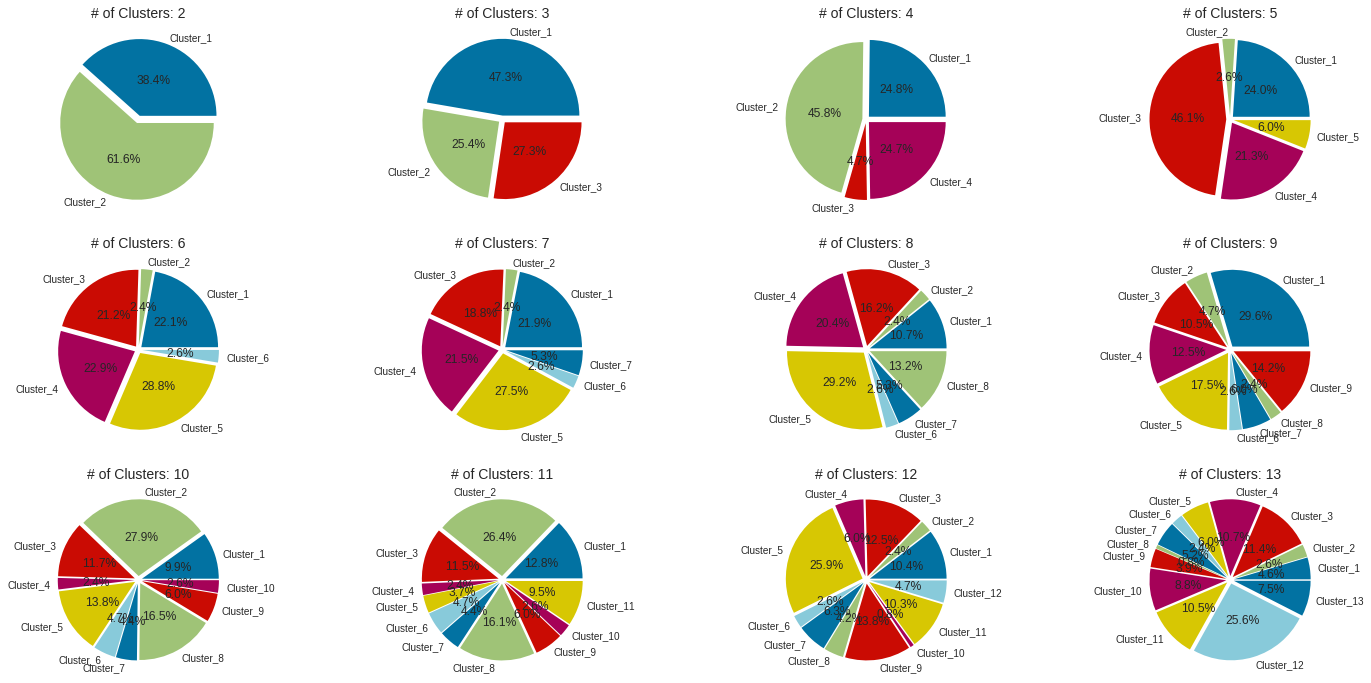

In [46]:
# To get a better idea about the possible number of cluster we have the following graph that shows the percentage of customer per cluster from 2 - 12 clusters
fig, ax = plt.subplots(3,4,figsize=[25,12])
ax = ax.ravel()

for k in pie:
  i= str(k.shape[0])
  g1 = k.plot(kind='pie',y='values', autopct="%.1f%%", labels=k['labels'],explode=[0.05]*int(i), pctdistance=0.5,ax=ax[int(i)-2], legend=[] )
  g1.set_title("# of Clusters: {}".format(i), fontsize=14)
  g1.set_ylabel(' ')

plt.show()

In [47]:
model = KMeans(init="random",n_clusters = 3, max_iter = 100,random_state=42)
model.fit(pca_mk)
predictions = model.predict(pca_mk)
mk["clusters"] =  predictions
# I decided that 3 clusters is a good number to segment the audience based on the pie charts showed above